# Lead Scoring Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Step 1: Importing Libraries and  Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset
leads_df=pd.read_csv("Leads.csv")

### Step 2: Reading and Understanding the Data

In [3]:
leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
leads_df.shape

(9240, 37)

In [5]:
# statstical analysis of data
leads_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# information for each column

leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

we need to take care of null values present in some columns.

### Step 3: EDA (Exploratory Data Analysis)

In [7]:
#dropping Lead Number and Prospect ID since they have all unique values and they will not be much help in model building.

leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

- As can be seen,there are few columns with level called 'Select' which means that the customer had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we will convert 'Select' values to 'Nan'

In [8]:
#Replacing 'Select' values with Nan
leads_df=leads_df.replace("Select", np.nan)

In [9]:
#Checking the percentage of missing values in each column
(leads_df.isnull().sum())/(leads_df.shape[0]) *100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

#### We need to drop columns with high percent of missing values as they may reduce the predction capability of the model.

In [10]:
cols = leads_df.columns

for i in cols :
    if((leads_df[i].isnull().sum())/(leads_df.shape[0]) *100) >= 35:
        leads_df.drop(i, 1, inplace = True)

In [11]:
#checking percentage of null values in each column after dropping columns with more than 35% missing values

(leads_df.isnull().sum())/(leads_df.shape[0]) *100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

### Categorical Attributes Analysis

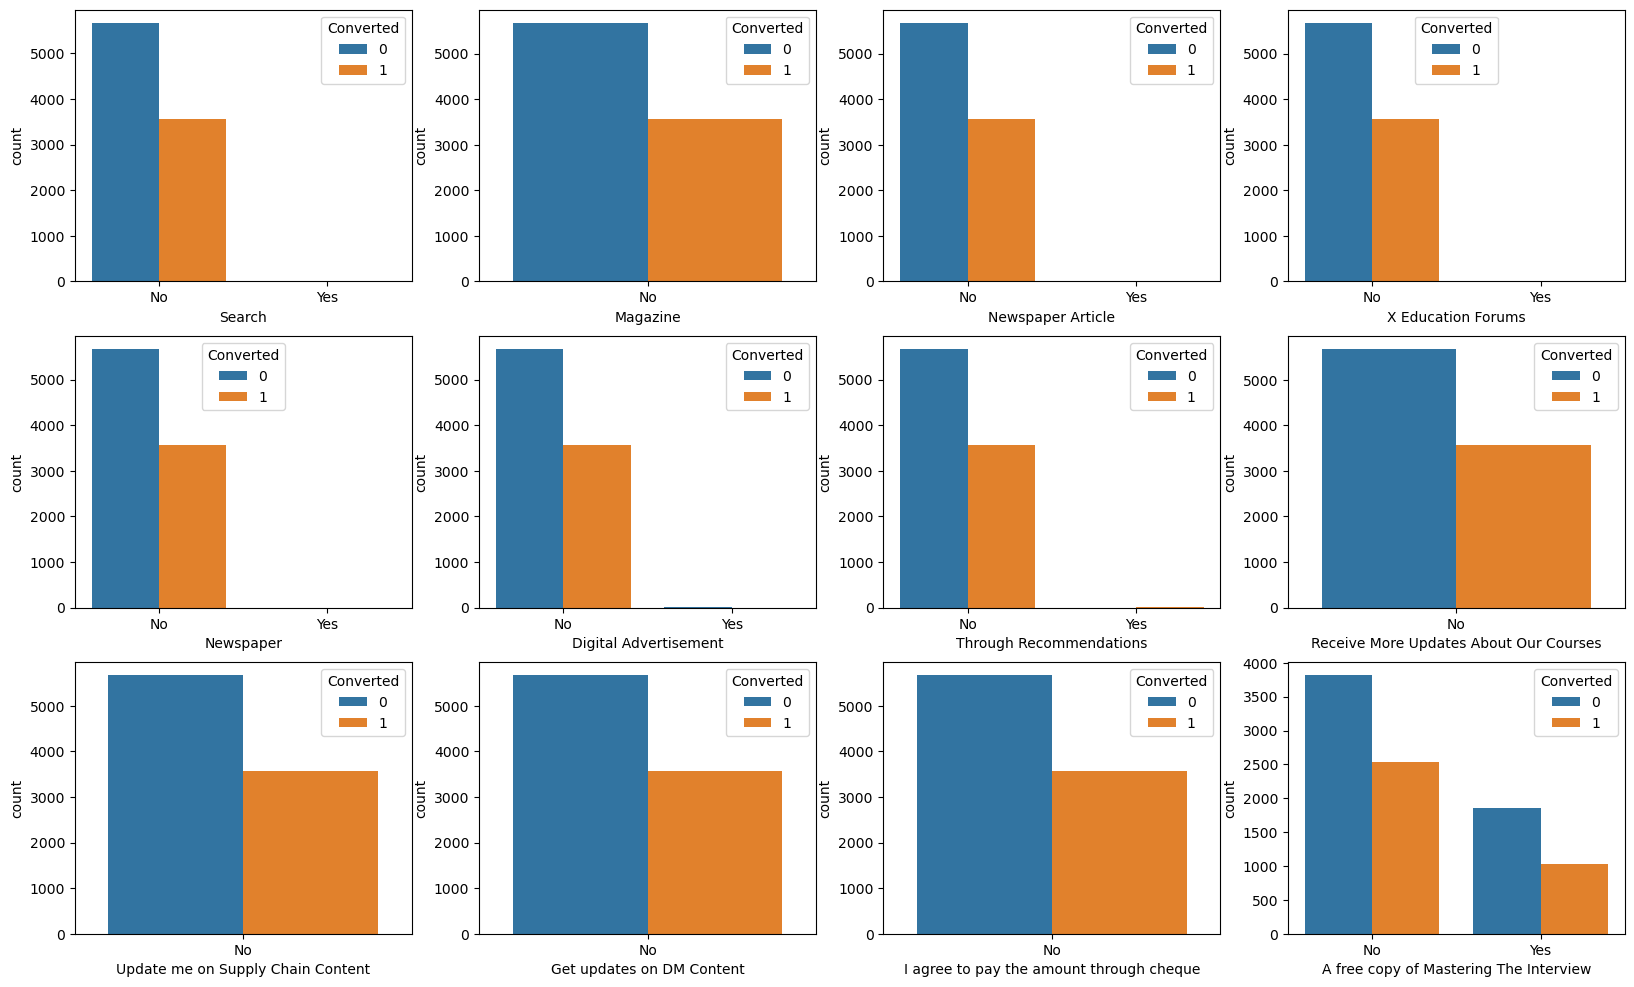

In [12]:
# Visualizing variables for imbalancing

fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = leads_df, ax = axs[0,0])
sns.countplot(x = "Magazine", hue = "Converted", data = leads_df, ax = axs[0,1])
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_df, ax = axs[0,2])
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_df, ax = axs[0,3])
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_df, ax = axs[1,0])
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_df, ax = axs[1,1])
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_df, ax = axs[1,2])
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads_df, ax = axs[1,3])
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =leads_df, ax = axs[2,0])
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads_df, ax = axs[2,1])
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads_df, ax = axs[2,2])
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_df, ax = axs[2,3])
plt.show()

**Observation**

For all these columns except 'A free copy of Mastering The Interview' data is highly imbalanced, thus we will drop them


In [13]:
#creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

#### Lead Source

In [14]:
#checking value counts of Lead Source column

leads_df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [15]:
#replacing Nan Value with Google as Google is having highest number of occurences
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')

In [16]:
#combining low frequency values to Others

leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

In [17]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =leads_df )
s1.set_xticklabels(s1.get_xticklabels(),rotation = 90)
plt.show()

**Observation**

Maximum Leads are generated by Google and Direct Traffic.
Conversion rate of Reference leads and Welinkgak Website leads is very high.

#### Country

In [18]:
#checking value counts of Country column

leads_df['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [19]:
#Imputing missing values in Country column with "'not provided"
leads_df['Country'] = leads_df['Country'].replace(np.nan,'not provided')

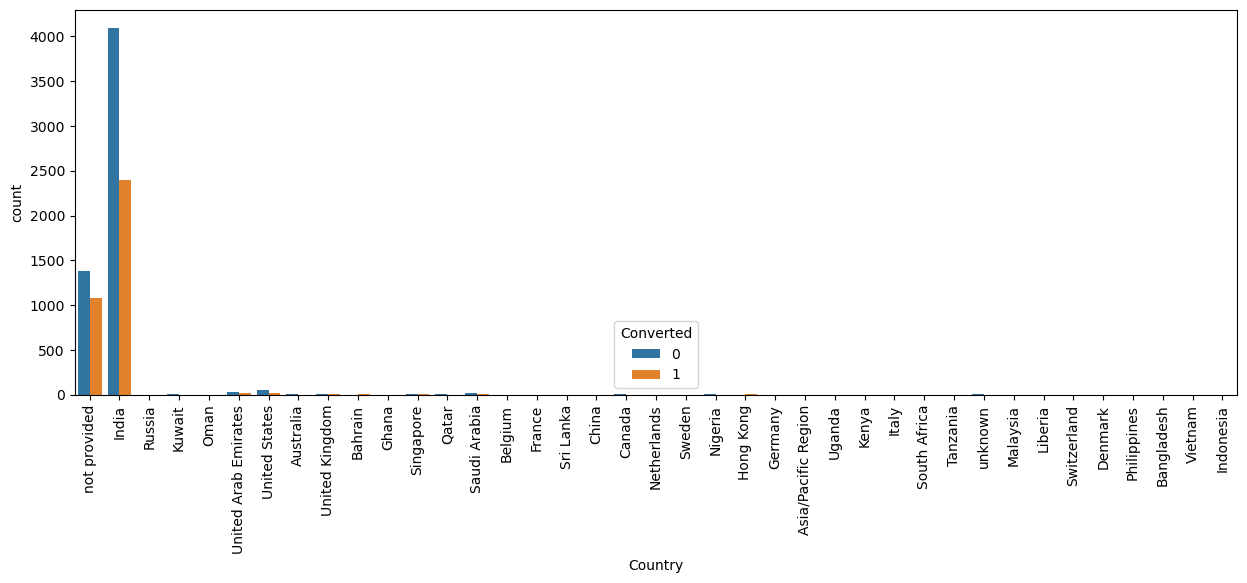

In [20]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =leads_df )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Observation**

As we can see that most of the data consists of value 'India', no inference can be drawn from this parameter.Hence, we can drop this column

In [21]:
#creating a list of columns to be droppped

cols_to_drop.append('Country')

#### What is your current occupation

In [22]:
#checking value counts of 'What is your current occupation' column
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
#Creating new category 'Not provided' for the missing values as 'NaN'

leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not provided')

In [24]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = leads_df )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Observation**

- Maximum leads generated are unemployed and their conversion rate is more than 50%.
- Conversion rate of working professionals is very high.

#### What matters most to you in choosing a course

In [25]:
#checking value counts of 'What matters most to you in choosing a course'

leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan,'Not Provided')

In [27]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = leads_df )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Observation**

- This column consists on entry Better Career Prospect also there are lots of missing entries in this column , hence it can be dropped.

In [28]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Country',
 'What matters most to you in choosing a course']

#### Last Activity

In [29]:
#checking value counts of Last Activity
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [30]:
## Missing values can be imputed with mode value 'Email Opened'


leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Email Opened')

In [31]:
#combining low frequency values
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

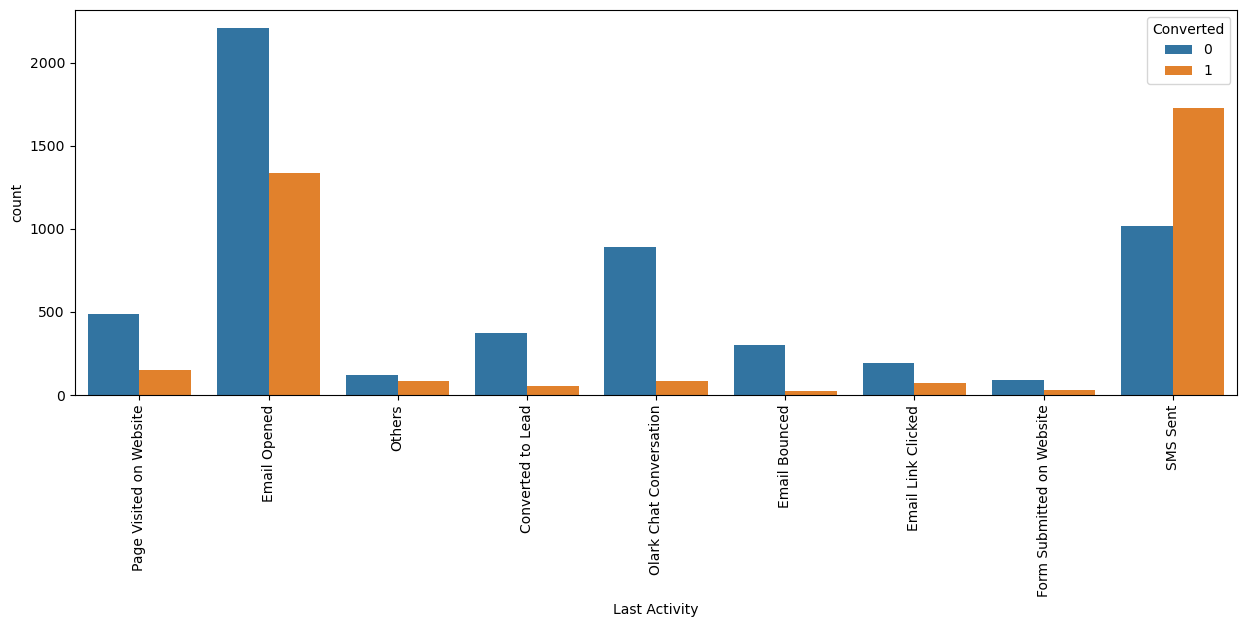

In [32]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads_df )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Observation**

- Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
- SMS sent as last acitivity has high conversion rate.

In [33]:
leads_df['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [34]:
leads_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [35]:
leads_df[['Last Notable Activity','Last Activity']]

Last Notable Activity            Last Activity
0                 Modified  Page Visited on Website
1             Email Opened             Email Opened
2             Email Opened             Email Opened
3                 Modified                   Others
4                 Modified        Converted to Lead
...                    ...                      ...
9235     Email Marked Spam                   Others
9236              SMS Sent                 SMS Sent
9237              SMS Sent                 SMS Sent
9238              SMS Sent                 SMS Sent
9239              Modified                 SMS Sent

[9240 rows x 2 columns]

In [36]:
# Append 'Last Notable Activity' to the cols_to_drop List ,as this column is almost similar to Last activity column
cols_to_drop.append('Last Notable Activity')

In [37]:
#Check the Null Values in All Columns after imputation:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [38]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data except 'Country' and
# 'What matters most to you in choosing a course' which are already in the drop list.
leads_df = leads_df.dropna()

In [39]:
leads_df.shape

(9103, 25)

In [40]:
#Checking percentage of Null Values in All Columns:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

#### Lead Origin

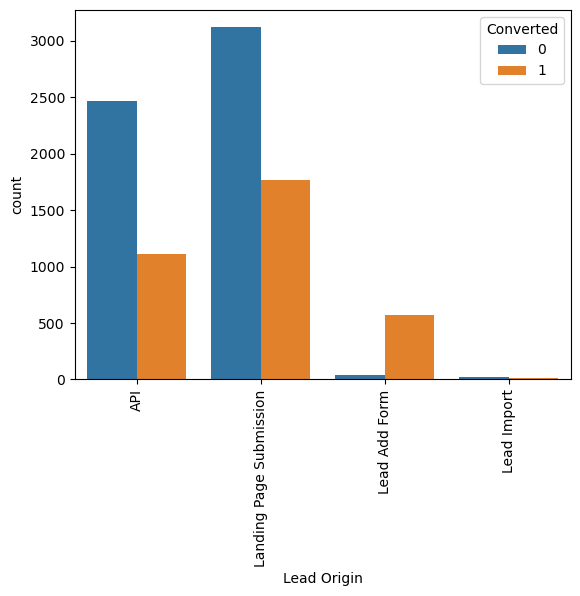

In [41]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = leads_df )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Do Not Email & Do Not Call

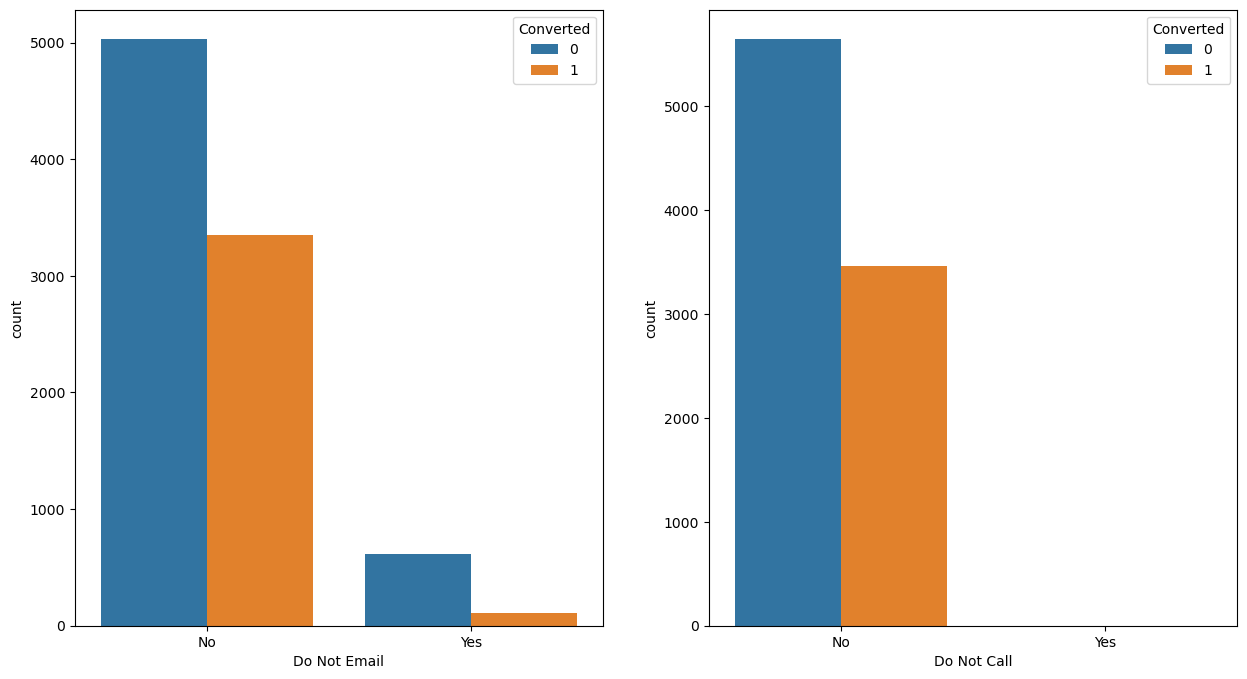

In [42]:
fig, axs = plt.subplots(1,2,figsize = (15,8))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[1])
plt.show()

In [43]:
## We Can append the Do Not Call Column to the list of Columns to be Dropped data is highly skewed

In [44]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Country',
 'What matters most to you in choosing a course',
 'Last Notable Activity',
 'Do Not Call']

In [45]:
#dropping columns
leads = leads_df.drop(cols_to_drop,1)

#checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 782.3+ KB


In [46]:
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity What is your current occupation  \
0  Page Visited on Website                      Unemployed   
1             Email Opened                      Unemployed   
2             Email Opened                         Student   
3                   Others                      Unemployed   
4        Converted to Lead                      Unemployed   

  A free copy of Mastering The Interview  
0                                     No  
1                                     No  
2                                    Yes  
3                                     No  
4                                     No

### Numeric Attributes Analysis

#### Converted

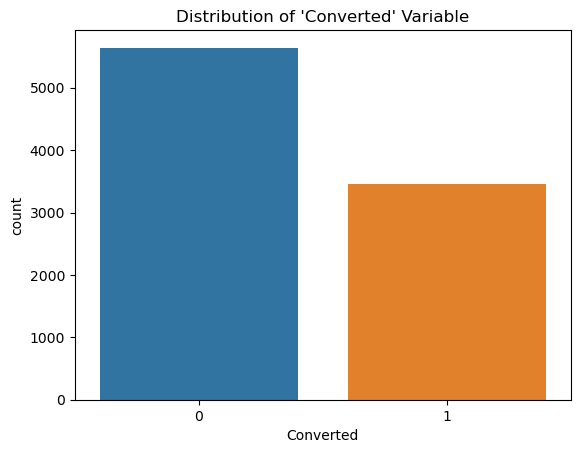

In [47]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(leads.Converted)
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [48]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

#### Currently, Lead Conversion Rate is 38% only

#### Total visits

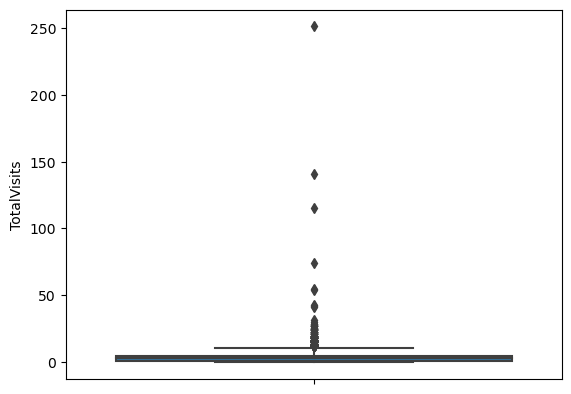

In [49]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [50]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [51]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [52]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

**Observation**

As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

#### Total time spent on website

In [53]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [54]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

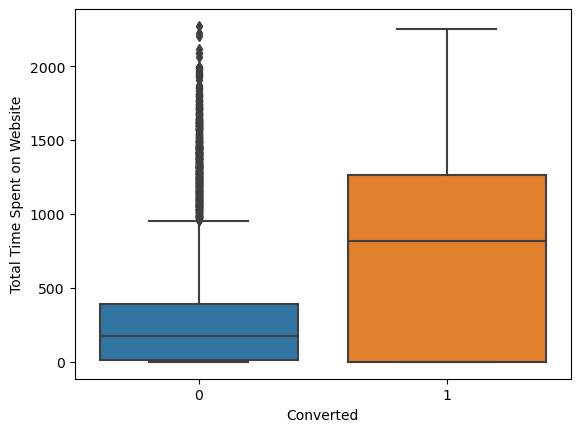

In [55]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()


**Observation**

As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

#### Page views per visit

In [56]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [57]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

In [58]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [59]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

**Observation**

Median for converted and not converted leads is almost same.
Nothing conclusive can be said on the basis of Page Views Per Visit.

#### Now, all data labels are in good shape , we will proceed to our next step which is Data Preparation

### Step 4 : Data Preparation

#### Converting Yes/No variables to 1/0

In [60]:
# List of variables to map

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [61]:
leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity What is your current occupation  \
0  Page Visited on Website                      Unemployed   
1             Email Opened                      Unemployed   
2             Email Opened                         Student   
3                   Others                      Unemployed   
4        Converted to Lead                      Unemployed   

   A free copy of Mastering The Interview  
0                                       0  
1                                       0  
2                                       1  
3                                       0  
4                                       0

In [62]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   int64  
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 782.3+ KB


#### Dummy Variable Creation

In [63]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation'],
      dtype='object')

In [64]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],1)



dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)


dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Not provided'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads[['Last Activity']],drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

In [65]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [66]:
#checking dataset after dummy variable creation
leads.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           1  ...   
3                        0                           1  ...   
4                        0                           0  ...   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_Working Professional  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  
0                                      1                       0  
1                                      0                       0  
2                                      0                       0  
3                                      0                       0  
4                                      0                       0  

[5 rows x 32 columns]

### Step 5 : Test-Train Split

In [67]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [68]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   ...  What is your current occupation_Unemployed  \
0  ...                                           1   
1  ...                                           1   
2  ...                                           0   
3  ...                                           1   
4  ...                                           1   

   What is your current occupation_Working Professional  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  
0                                      1                       0  
1                                      0                       0  
2                                      0                       0  
3                                      0                       0  
4                                      0                       0  

[5 

In [69]:
# Putting response variable to y
y = leads['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [70]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6 : Feature Scaling

In [71]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize


In [72]:
X_train.describe()

Do Not Email  TotalVisits  Total Time Spent on Website  \
count   6372.000000  6372.000000                  6372.000000   
mean       0.079567     3.190835                   480.633082   
std        0.270643     2.795998                   545.564642   
min        0.000000     0.000000                     0.000000   
25%        0.000000     1.000000                     9.000000   
50%        0.000000     3.000000                   243.000000   
75%        0.000000     5.000000                   918.000000   
max        1.000000    10.000000                  2253.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  \
count           6372.000000                             6372.000000   
mean               2.260066                                0.316855   
std                1.795442                                0.465287   
min                0.000000                                0.000000   
25%                1.000000                                0.000000   
50%                2.000000                                0.000000   
75%                3.000000                                1.000000   
max                6.000000                                1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          6372.000000                6372.000000   
mean                              0.536566                   0.067797   
std                               0.498700                   0.251416   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Source_Direct Traffic  \
count              6372.000000                 6372.000000   
mean                  0.004080                    0.275424   
std                   0.063752                    0.446763   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    1.000000   
max                   1.000000                    1.000000   

       Lead Source_Facebook  ...  What is your current occupation_Unemployed  \
count           6372.000000  ...                                 6372.000000   
mean               0.004080  ...                                    0.609699   
std                0.063752  ...                                    0.487856   
min                0.000000  ...                                    0.000000   
25%                0.000000  ...                                    0.000000   
50%                0.000000  ...                                    1.000000   
75%                0.000000  ...                                    1.000000   
max                1.000000  ...                                    1.000000   

       What is your current occupation_Working Professional  \
count                                        6372.000000      
mean                                            0.073917      
std                                             0.261657      
min                                             0.000000      
25%                                             0.000000      
50%                                             0.000000      
75%                                             0.000000      
max                                             1.000000      

       Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
count                  6372.000000                       6372.000000   
mean                      0.035311                          0.028562   
std                       0.184579                         

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 31 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6372 non-null   int64  
 1   TotalVisits                                           6372 non-null   float64
 2   Total Time Spent on Website                           6372 non-null   int64  
 3   Page Views Per Visit                                  6372 non-null   float64
 4   A free copy of Mastering The Interview                6372 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6372 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6372 non-null   uint8  
 7   Lead Origin_Lead Import                               6372 non-null   uint8  
 8   Lead Source_Direct Traffic                            6

In [74]:
#normalising the features

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = normalize(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
7962             0     0.002333                     0.999997   
5520             0     0.115313                     0.988399   
1962             0     0.029570                     0.999453   
1566             0     0.008058                     0.999964   
9170             0     0.000000                     0.000000   

      Page Views Per Visit  A free copy of Mastering The Interview  \
7962              0.001166                                       0   
5520              0.098840                                       0   
1962              0.014785                                       0   
1566              0.002820                                       0   
9170              0.000000                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7962                                    1                          0   
5520                                    1                          0   
1962                                    1                          0   
1566                                    1                          0   
9170                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
7962                        0                           0   
5520                        0                           1   
1962                        0                           0   
1566                        0                           0   
9170                        0                           0   

      Lead Source_Facebook  ...  What is your current occupation_Unemployed  \
7962                     0  ...                                           1   
5520                     0  ...                                           1   
1962                     0  ...                                           1   
1566                     0  ...                                           0   
9170                     0  ...                                           1   

      What is your current occupation_Working Professional  \
7962                                                  0      
5520                                                  0      
1962                                                  0      
1566                                                  1      
9170                                                  0      

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
7962                            0                                 0   
5520                            0                                 0   
1962                            0                                 0   
1566                            0                                 0   
9170                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
7962                           0                                        0   
5520                           1                                        0   
1962                           0                                        0   
1566                           1                                        0   
9170                           1                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
7962                                      0                     0   
5520                                      0                     0   
1962                                      0                     0   
1566                                      0                     0   
9170                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  
7962                                      0                       1  
5520                                      0                       0  
1962                                 

In [75]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [76]:
X_test = X_test.drop(['Lead Source_Facebook','Lead Origin_Lead Add Form'],axis =1)

In [77]:
X_train = X_train.drop(['Lead Source_Facebook','Lead Origin_Lead Add Form'],axis =1)

In [78]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [79]:
X_train = X_train.drop(['Page Views Per Visit'],axis =1)

In [80]:
X_test = X_test.drop(['Page Views Per Visit'],axis =1)

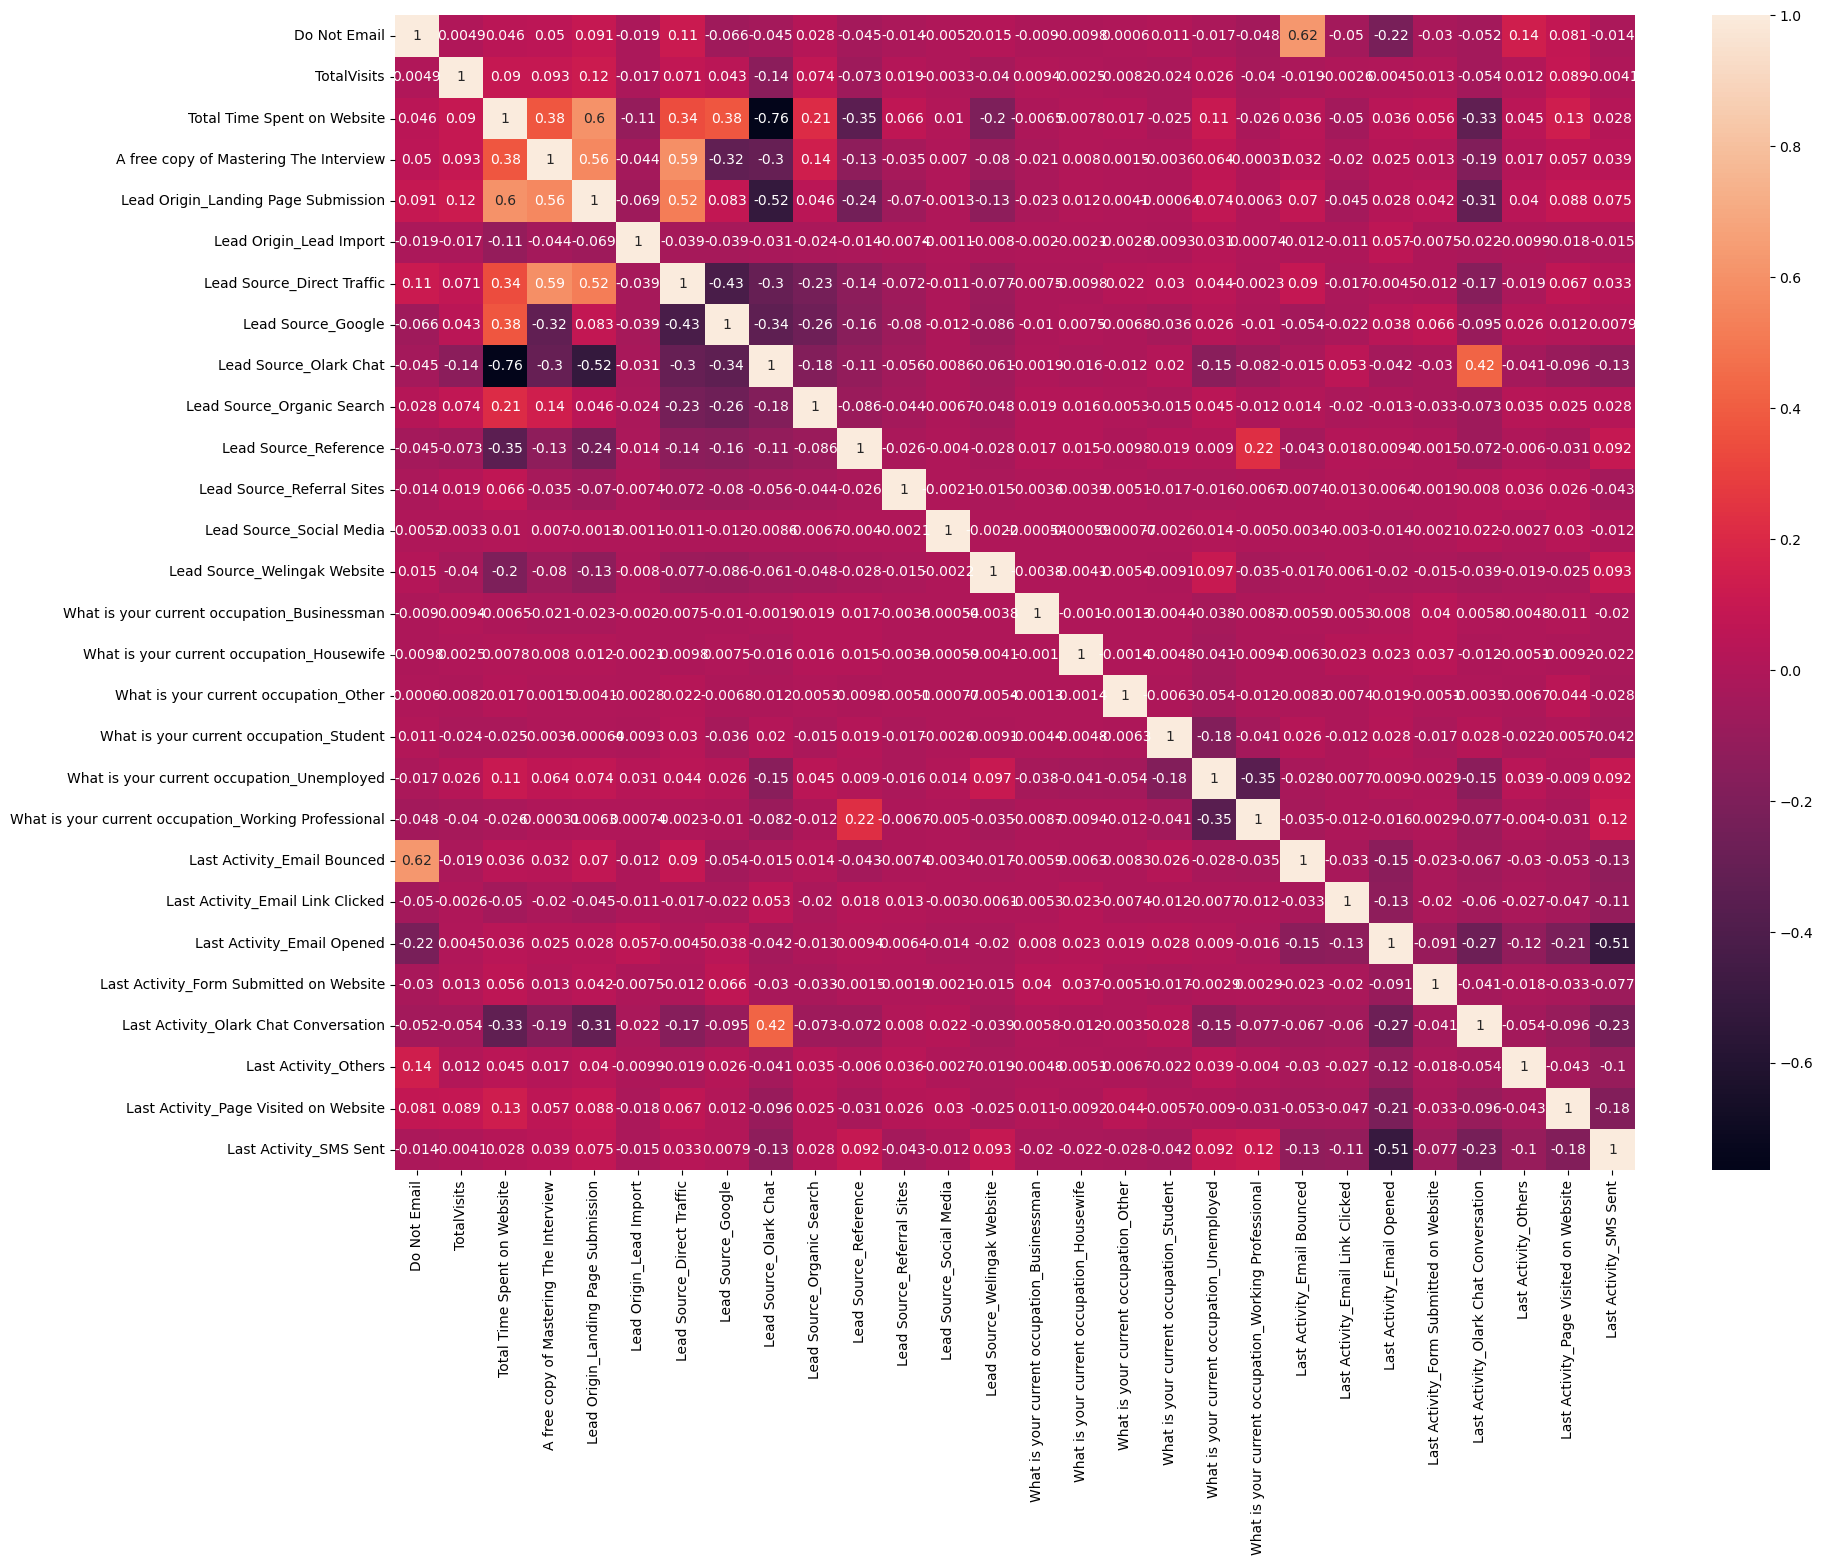

In [81]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

column 'Olark chat' and 'total time spent on website' are highly correlated as Correlation coe is -0.76 (people using olark chat are spending more time on website)

In [82]:
X_train = X_train.drop(['Lead Source_Olark Chat'],axis =1)
X_test = X_test.drop(['Lead Source_Olark Chat'],axis =1)

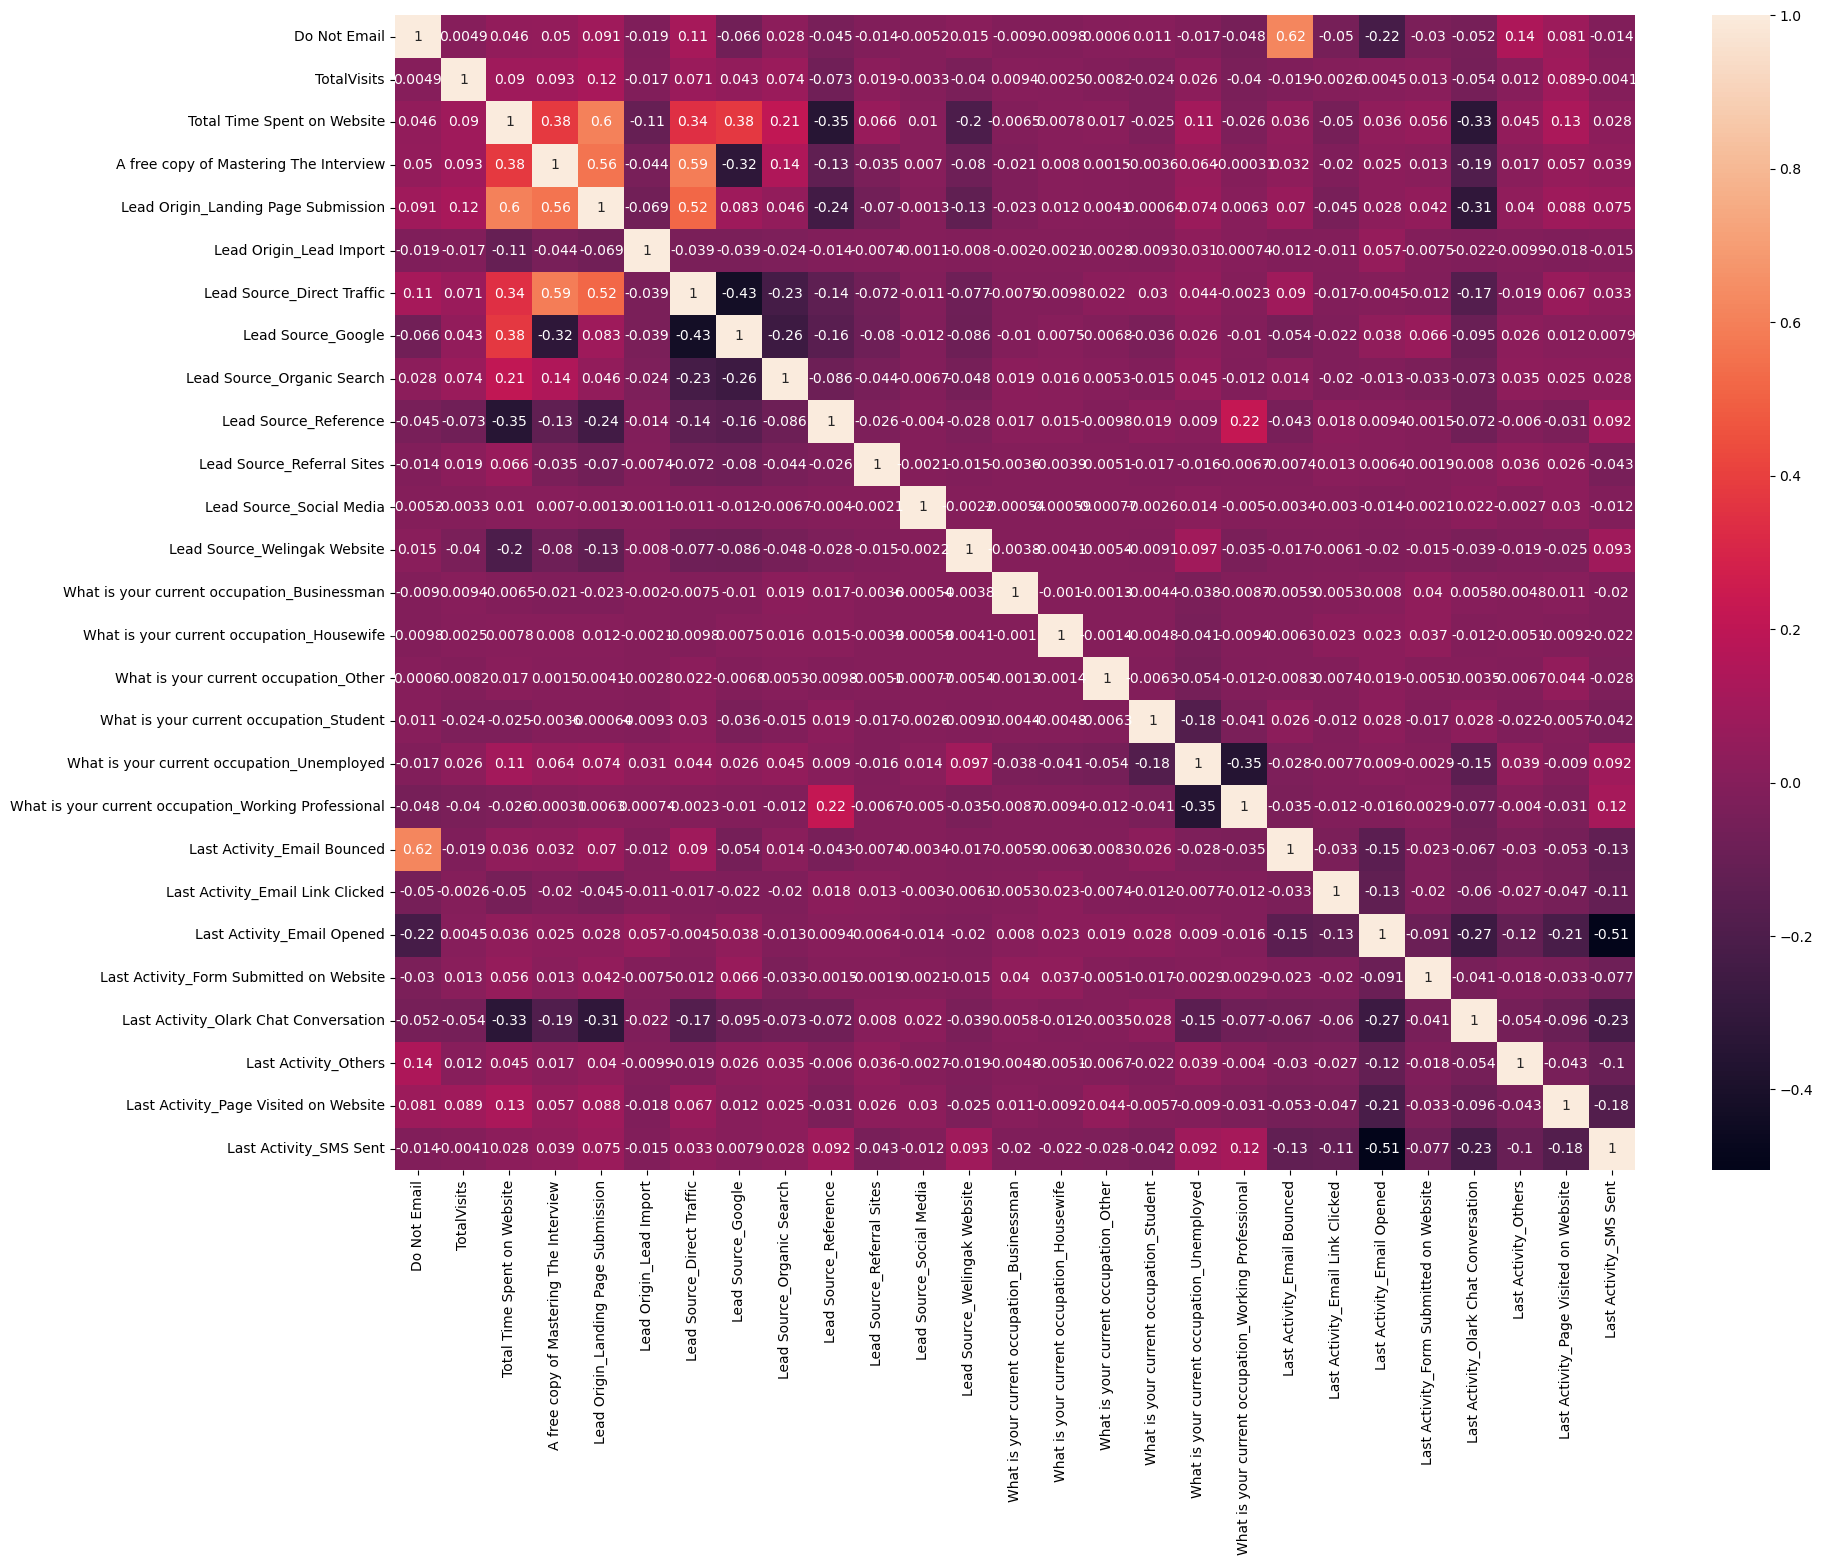

In [83]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [84]:
X_train = X_train.drop(['Lead Origin_Landing Page Submission'],axis =1)
X_test = X_test.drop(['Lead Origin_Landing Page Submission'],axis =1)

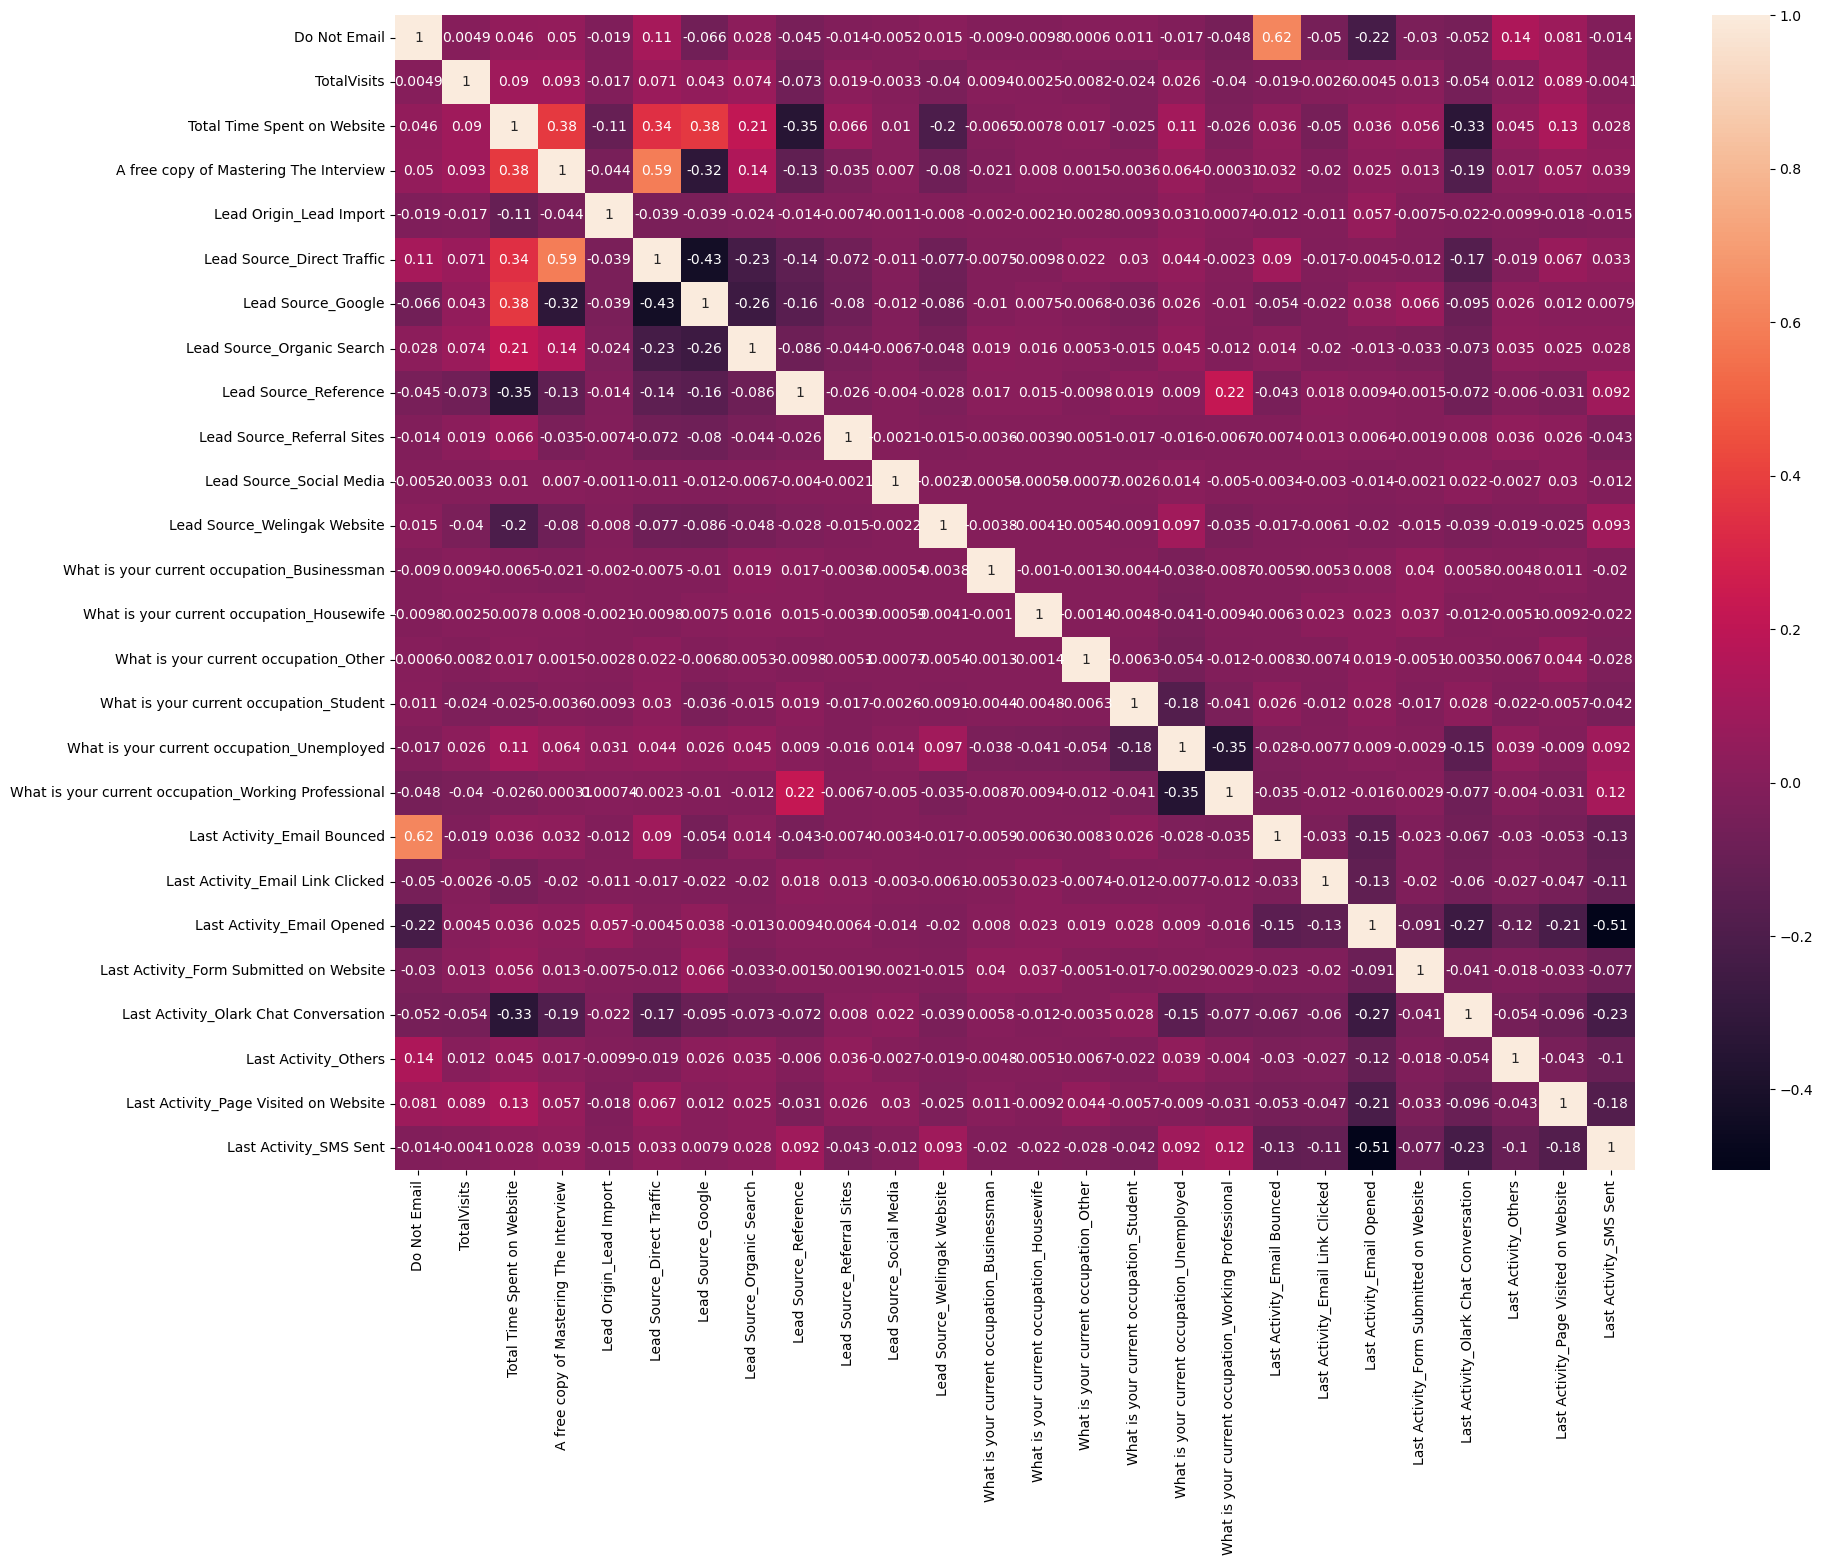

In [85]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [86]:
X_train = X_train.drop(['Last Activity_Email Bounced'],axis =1)
X_test = X_test.drop(['Last Activity_Email Bounced'],axis =1)

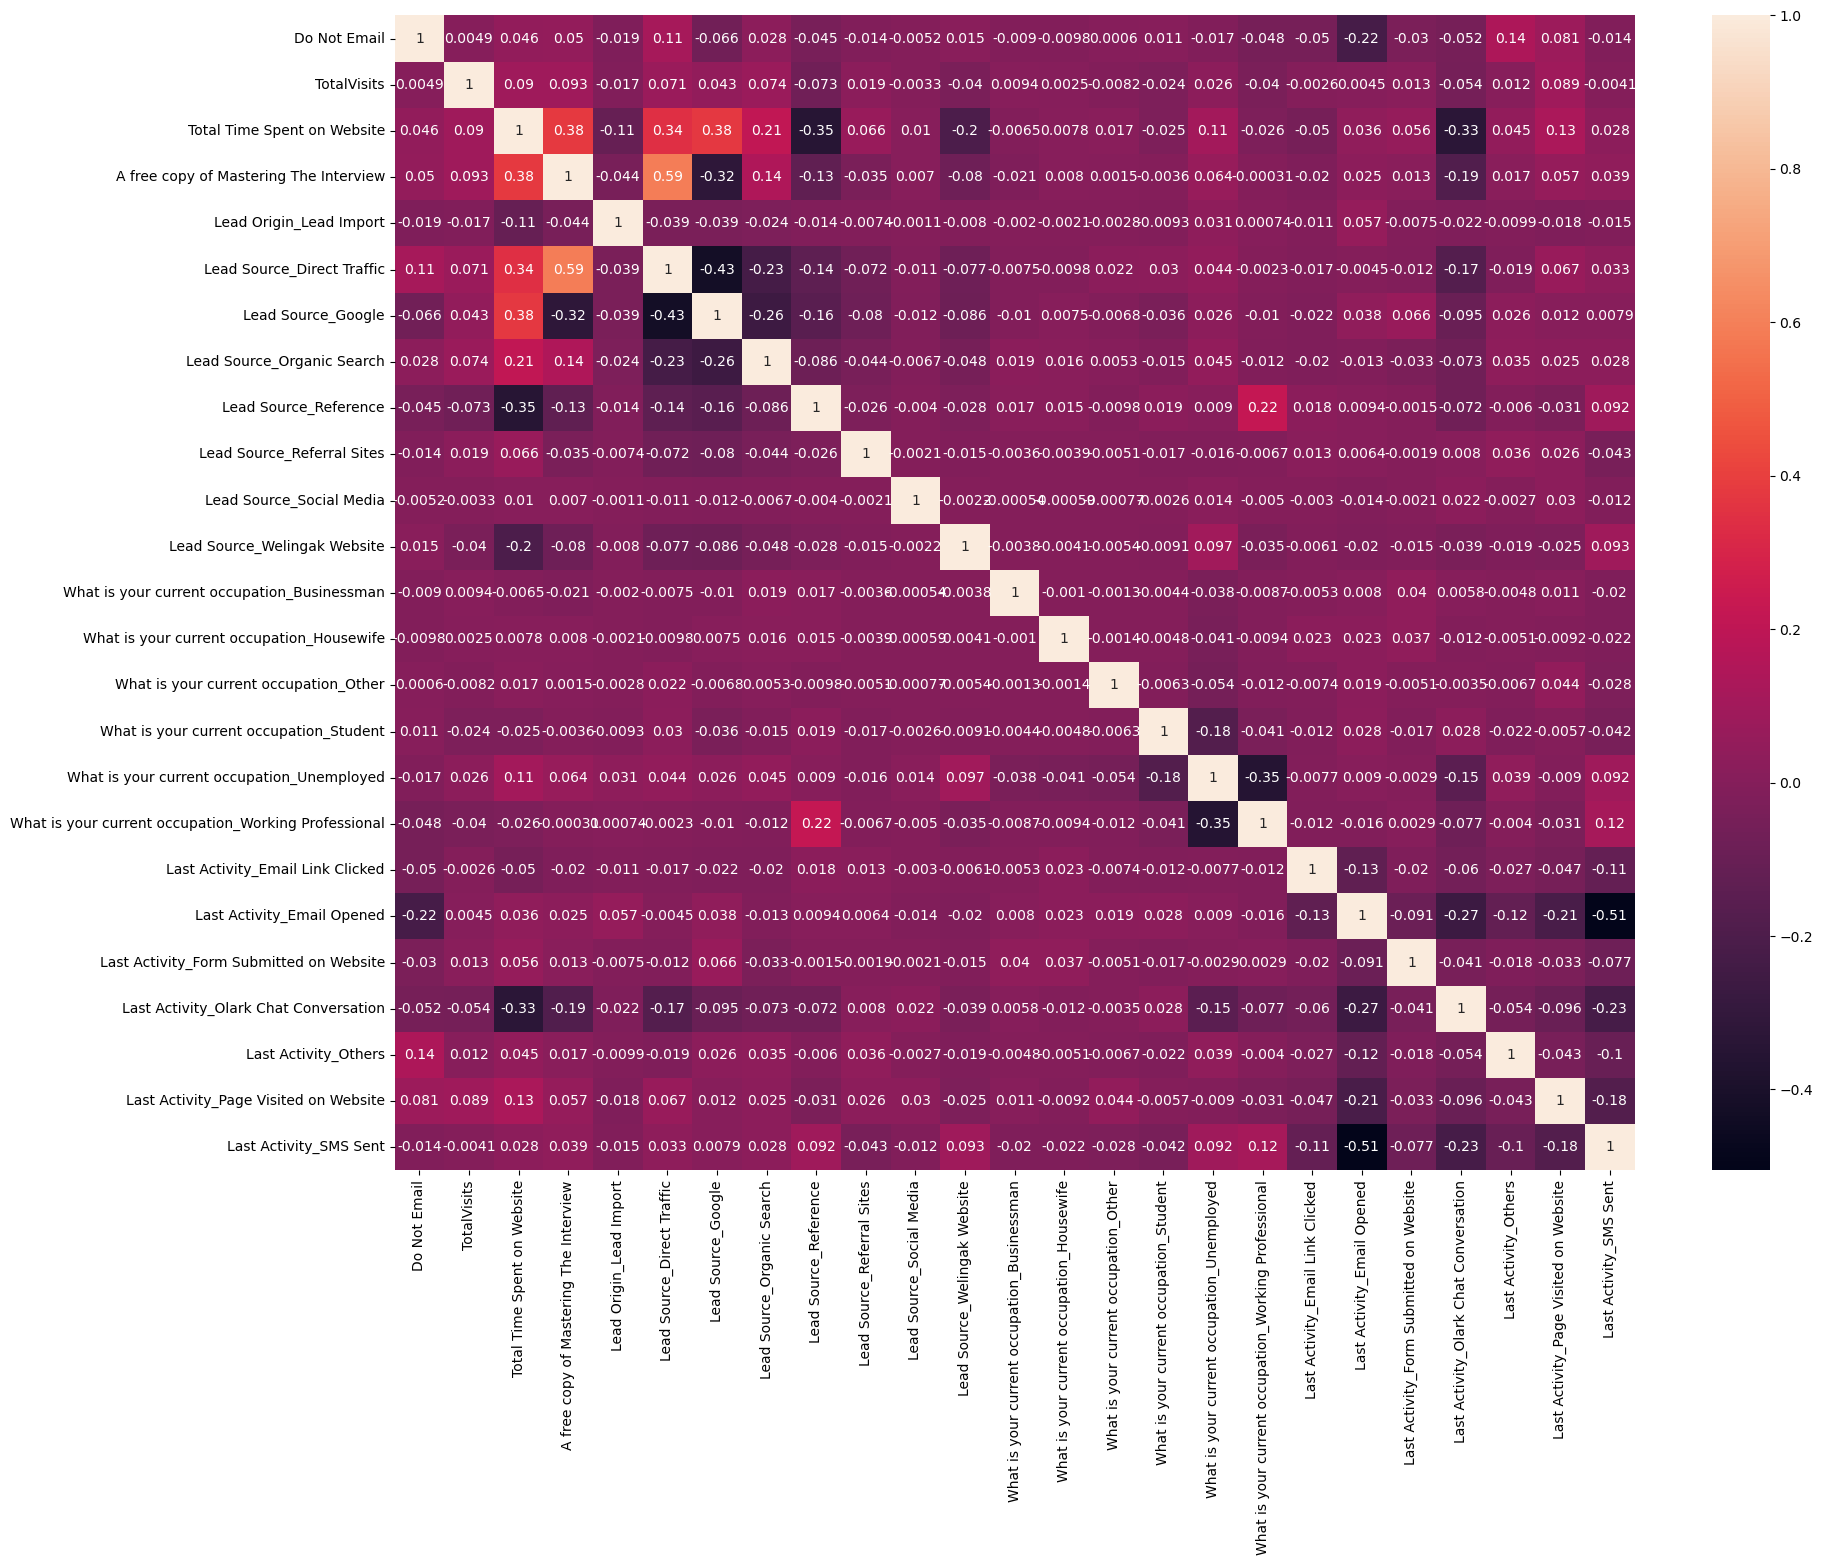

In [87]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [88]:
X_train = X_train.drop(['A free copy of Mastering The Interview'],axis =1)
X_test = X_test.drop(['A free copy of Mastering The Interview'],axis =1)

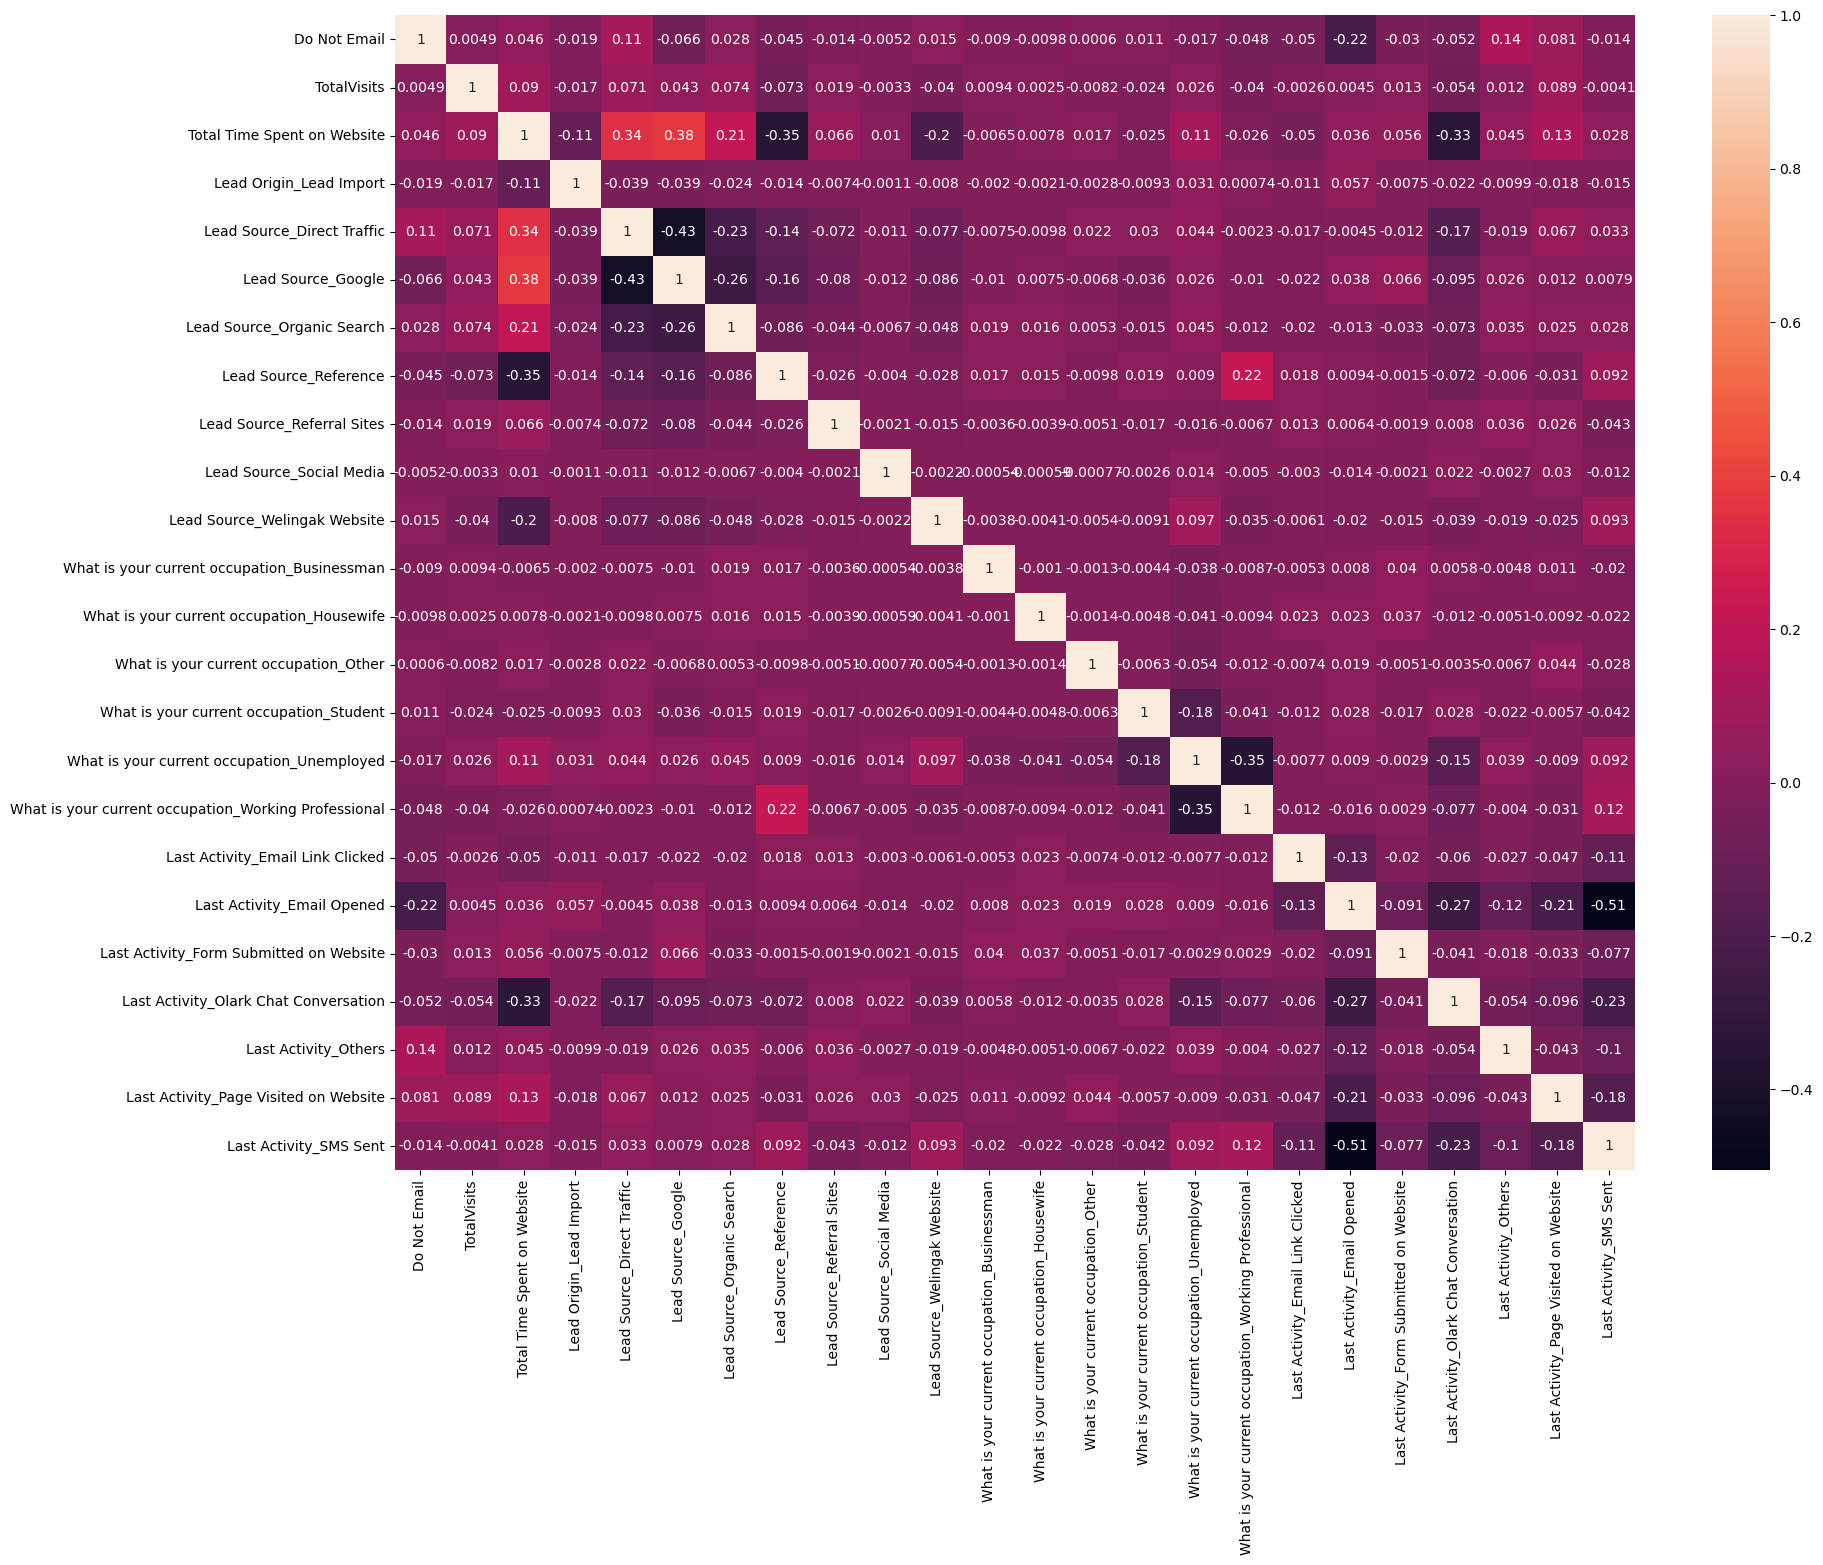

In [89]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model building using Stats Model and RFE

In [90]:
# importing necessary library
import statsmodels.api as sm

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [92]:
rfe.support_

array([ True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True])

In [93]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', False, 9),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Direct Traffic', False, 7),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 5),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 2),
 ('Last Activity_Olark Chat Conversation', False, 6),
 ('Last Activity_Others'

In [94]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent'],
      dtype='object')

In [95]:
X_train.columns[~rfe.support_]

Index(['Total Time Spent on Website', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')

#### Model - 1

In [96]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3001.5
Date:                Mon, 17 Jul 2023   Deviance:                       6003.1
Time:                        20:21:58   Pearson chi2:                 7.45e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3200
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9731      0.118    -25.190      0.000      -3.204      -2.742
Do Not Email                                            -1.2657      0.160     -7.891      0.000      -1.580      -0.951
TotalVisits                                             -7.6100      0.917     -8.301      0.000      -9.407      -5.813
Lead Source_Reference                                    2.2410      0.225      9.965      0.000       1.800       2.682
Lead Source_Welingak Website                             4.0407      0.730      5.536      0.000       2.610       5.471
What is your current occupation_Businessman              2.2864      0.925      2.472      0.013       0.473       4.099
What is your current occupation_Housewife               24.6538   1.71e+04      0.001      0.999   -3.34e+04    3.35e+04
What is your current occupation_Other                    2.0437      0.600      3.405      0.001       0.867       3.220
What is your current occupation_Student                  1.2491      0.220      5.685      0.000       0.818       1.680
What is your current occupation_Unemployed               1.2528      0.080     15.616      0.000       1.096       1.410
What is your current occupation_Working Professional     3.8661      0.192     20.168      0.000       3.490       4.242
Last Activity_Email Link Clicked                         0.7532      0.222      3.387      0.001       0.317       1.189
Last Activity_Email Opened                               1.3066      0.112     11.697      0.000       1.088       1.525
Last Activity_Others                                     1.8045      0.217      8.307      0.000       1.379       2.230
Last Activity_Page Visited on Website                    0.9985      0.161      6.215      0.000       0.684       1.313
Last Activity_SMS Sent                                   2.4519      0.114     21.566      0.000       2.229       2.675
========================================================================================================================
"""

- The p value for What is your current occupation_Housewife is very high,so it is not significant for the model. We should drop the column.

In [97]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

#### Model - 2

In [98]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3015.7
Date:                Mon, 17 Jul 2023   Deviance:                       6031.4
Time:                        20:21:58   Pearson chi2:                 7.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3170
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9418      0.117    -25.106      0.000      -3.171      -2.712
Do Not Email                                            -1.2663      0.160     -7.903      0.000      -1.580      -0.952
TotalVisits                                             -7.5083      0.905     -8.294      0.000      -9.283      -5.734
Lead Source_Reference                                    2.2652      0.225     10.051      0.000       1.823       2.707
Lead Source_Welingak Website                             4.0427      0.730      5.539      0.000       2.612       5.473
What is your current occupation_Businessman              2.2503      0.925      2.432      0.015       0.437       4.064
What is your current occupation_Other                    2.0143      0.600      3.356      0.001       0.838       3.191
What is your current occupation_Student                  1.2178      0.219      5.550      0.000       0.788       1.648
What is your current occupation_Unemployed               1.2234      0.079     15.389      0.000       1.068       1.379
What is your current occupation_Working Professional     3.8347      0.191     20.050      0.000       3.460       4.210
Last Activity_Email Link Clicked                         0.7611      0.221      3.449      0.001       0.329       1.194
Last Activity_Email Opened                               1.3070      0.111     11.747      0.000       1.089       1.525
Last Activity_Others                                     1.7969      0.217      8.284      0.000       1.372       2.222
Last Activity_Page Visited on Website                    0.9887      0.160      6.167      0.000       0.674       1.303
Last Activity_SMS Sent                                   2.4415      0.113     21.552      0.000       2.219       2.664
========================================================================================================================
"""

- All features in model 2 seems significant with low p values. So we can consider this as our stable model.

### VIF Calculation

In [99]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7          What is your current occupation_Unemployed  2.54
13                             Last Activity_SMS Sent  1.82
10                         Last Activity_Email Opened  1.78
8   What is your current occupation_Working Profes...  1.30
12              Last Activity_Page Visited on Website  1.16
2                               Lead Source_Reference  1.13
1                                         TotalVisits  1.12
0                                        Do Not Email  1.11
11                               Last Activity_Others  1.08
9                    Last Activity_Email Link Clicked  1.05
3                        Lead Source_Welingak Website  1.04
6             What is your current occupation_Student  1.04
5               What is your current occupation_Other  1.01
4         What is your current occupation_Businessman  1.00

- All variables have VIF value less than 5 , so are significant for the model. We do not need to drop any variables.

### Predicting the Train Model

In [100]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.669433
5520    0.218031
1962    0.622722
1566    0.894681
9170    0.398584
5097    0.163180
8954    0.656004
309     0.364919
5519    0.377482
1050    0.395284
dtype: float64

In [101]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.66943265, 0.2180314 , 0.6227219 , 0.89468131, 0.39858441,
       0.16318015, 0.65600355, 0.36491872, 0.37748156, 0.39528357])

**

In [102]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob    ID
0          0        0.669433  7962
1          0        0.218031  5520
2          0        0.622722  1962
3          1        0.894681  1566
4          0        0.398584  9170

In [103]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob    ID  Predicted
0          0        0.669433  7962          1
1          0        0.218031  5520          0
2          0        0.622722  1962          1
3          1        0.894681  1566          1
4          0        0.398584  9170          0

### Metrices

In [104]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3485  468]
 [1040 1379]]


In [105]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7633396107972379


In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5700702769739562

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.8816089046293955

In [109]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.1183910953706046


In [110]:
# positive predictive value 
print (TP / float(TP+FP))

0.7466161342717921


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7701657458563536


### Plotting the ROC Curve

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

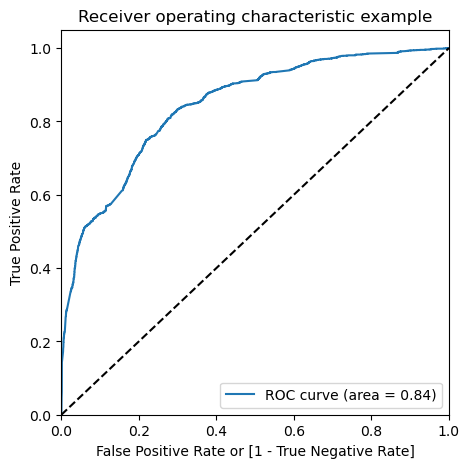

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob    ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.669433  7962          1    1    1    1    1    1    1   
1          0        0.218031  5520          0    1    1    1    0    0    0   
2          0        0.622722  1962          1    1    1    1    1    1    1   
3          1        0.894681  1566          1    1    1    1    1    1    1   
4          0        0.398584  9170          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    1    0    0    0  
1    0    0    0    0  
2    1    0    0    0  
3    1    1    1    0  
4    0    0    0    0

In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.521971  0.980570  0.241336
0.2   0.2  0.680948  0.904506  0.544144
0.3   0.3  0.714062  0.880529  0.612193
0.4   0.4  0.759416  0.575031  0.872249
0.5   0.5  0.763340  0.570070  0.881609
0.6   0.6  0.763810  0.550227  0.894510
0.7   0.7  0.720496  0.286895  0.985834
0.8   0.8  0.717985  0.276974  0.987857
0.9   0.9  0.686911  0.183547  0.994941


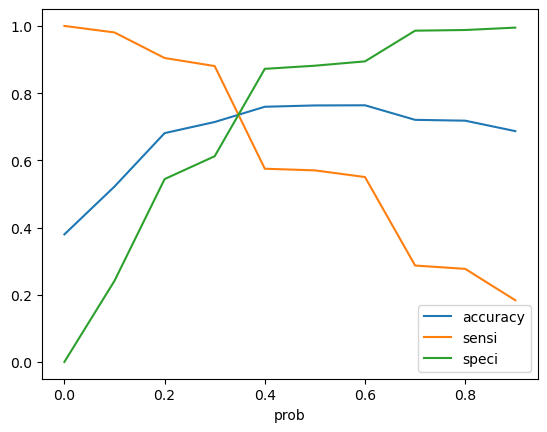

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [118]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Converted_prob    ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.669433  7962          1    1    1    1    1    1    1   
1          0        0.218031  5520          0    1    1    1    0    0    0   
2          0        0.622722  1962          1    1    1    1    1    1    1   
3          1        0.894681  1566          1    1    1    1    1    1    1   
4          0        0.398584  9170          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  final_Predicted  
0    1    0    0    0                1  
1    0    0    0    0                0  
2    1    0    0    0                1  
3    1    1    1    0                1  
4    0    0    0    0                1

# Lead Score of leads :
Higher lead score means it is hot lead

In [119]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','ID','final_Predicted','Lead_Score']].head()

Converted  Converted_prob    ID  final_Predicted  Lead_Score
0          0        0.669433  7962                1          67
1          0        0.218031  5520                0          22
2          0        0.622722  1962                1          62
3          1        0.894681  1566                1          89
4          0        0.398584  9170                1          40

In [120]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7402699309478971

In [121]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2672, 1281],
       [ 374, 2045]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8453906572964035

In [124]:
# Let us calculate specificity
TN / float(TN+FP)

0.6759423222868707

In [125]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.32405767771312927


In [126]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6148526758869512


In [127]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8772160210111621


### Precision and Recall

In [128]:
from sklearn.metrics import precision_score, recall_score

In [129]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6148526758869512

In [130]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8453906572964035

### Precision and Recall Trade off

In [131]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [132]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [133]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Prediction on Test Set

In [135]:
#normalising the features

X_test[['TotalVisits','Total Time Spent on Website']] = normalize(X_test[['TotalVisits','Total Time Spent on Website']])

X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3504             0     0.007075                     0.999975   
4050             0     0.000000                     0.000000   
7201             1     0.002809                     0.999996   
1196             0     0.009456                     0.999955   
8219             0     0.028329                     0.999599   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Google  \
3504                        0                           0                   0   
4050                        0                           0                   0   
7201                        0                           1                   0   
1196                        0                           0                   0   
8219                        0                           1                   0   

      Lead Source_Organic Search  Lead Source_Reference  \
3504                           1                      0   
4050                           0                      1   
7201                           0                      0   
1196                           1                      0   
8219                           0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  ...  \
3504                           0                         0  ...   
4050                           0                         0  ...   
7201                           0                         0  ...   
1196                           0                         0  ...   
8219                           0                         0  ...   

      What is your current occupation_Student  \
3504                                        0   
4050                                        0   
7201                                        0   
1196                                        0   
8219                                        0   

      What is your current occupation_Unemployed  \
3504                                           1   
4050                                           1   
7201                                           1   
1196                                           1   
8219                                           1   

      What is your current occupation_Working Professional  \
3504                                                  0      
4050                                                  0      
7201                                                  0      
1196                                                  0      
8219                                                  0      

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
3504                                 0                           1   
4050                                 0                           0   
7201                                 0                           0   
1196                                 0                           1   
8219                                 0                           0   

      Last Activity_Form Submitted on Website  \
3504                                        0   
4050                                        0   
7201                                        0   
1196                                        0   
8219                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
3504                                      0                     0   
4050                                      0                     0   
7201                                      0                     0   
1196                                      0                     0   
8219                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  
3504                                      0                       0  
4050                                      0                       1  
7201                                      0           

In [175]:
X_test = X_test[col]
X_test.head()

Do Not Email  TotalVisits  Lead Source_Reference  \
3504             0     0.007075                      0   
4050             0     0.000000                      1   
7201             1     0.002809                      0   
1196             0     0.009456                      0   
8219             0     0.028329                      0   

      Lead Source_Welingak Website  \
3504                             0   
4050                             0   
7201                             0   
1196                             0   
8219                             0   

      What is your current occupation_Businessman  \
3504                                            0   
4050                                            0   
7201                                            0   
1196                                            0   
8219                                            0   

      What is your current occupation_Other  \
3504                                      0   
4050                                      0   
7201                                      0   
1196                                      0   
8219                                      0   

      What is your current occupation_Student  \
3504                                        0   
4050                                        0   
7201                                        0   
1196                                        0   
8219                                        0   

      What is your current occupation_Unemployed  \
3504                                           1   
4050                                           1   
7201                                           1   
1196                                           1   
8219                                           1   

      What is your current occupation_Working Professional  \
3504                                                  0      
4050                                                  0      
7201                                                  0      
1196                                                  0      
8219                                                  0      

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
3504                                 0                           1   
4050                                 0                           0   
7201                                 0                           0   
1196                                 0                           1   
8219                                 0                           0   

      Last Activity_Others  Last Activity_Page Visited on Website  \
3504                     0                                      0   
4050                     0                                      0   
7201                     0                                      0   
1196                     0                                      0   
8219                     0                                      1   

      Last Activity_SMS Sent  
3504                       0  
4050                       1  
7201                       1  
1196                       0  
8219                       0

In [176]:
X_test_sm = sm.add_constant(X_test)

In [177]:
X_test_sm.shape

(2731, 15)

In [178]:
y_test_pred = res.predict(X_test_sm)    

In [179]:
y_test_pred[:10]

3504    0.385921
4050    0.952043
7201    0.362574
1196    0.381694
8219    0.280417
8747    0.163180
9048    0.051255
6524    0.141161
7693    0.344058
8187    0.952043
dtype: float64

In [180]:
# Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)

In [181]:
# Let's see the head
y_test_pred_1.head()

0
3504  0.385921
4050  0.952043
7201  0.362574
1196  0.381694
8219  0.280417

In [182]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [183]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [184]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [185]:
y_test_pred_final.head()

Converted    ID         0
3504          0  3504  0.385921
4050          1  4050  0.952043
7201          0  7201  0.362574
1196          0  1196  0.381694
8219          1  8219  0.280417

In [186]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [187]:
y_test_pred_final.head()

Converted    ID  Converted_prob
3504          0  3504        0.385921
4050          1  4050        0.952043
7201          0  7201        0.362574
1196          0  1196        0.381694
8219          1  8219        0.280417

#### Assigning Lead Score

In [188]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final[['ID','Converted','Converted_prob']]
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))

In [189]:
# Let's see the head of y_pred_final
y_test_pred_final.head()

ID  Converted  Converted_prob  Lead_Score
3504  3504          0        0.385921          39
4050  4050          1        0.952043          95
7201  7201          0        0.362574          36
1196  1196          0        0.381694          38
8219  8219          1        0.280417          28

In [190]:
y_test_pred_final['final_Predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [191]:
y_test_pred_final.head()

ID  Converted  Converted_prob  Lead_Score  final_Predicted
3504  3504          0        0.385921          39                1
4050  4050          1        0.952043          95                1
7201  7201          0        0.362574          36                1
1196  1196          0        0.381694          38                1
8219  8219          1        0.280417          28                0

In [192]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_Predicted)

0.7455144635664591

In [193]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_Predicted )
confusion2

array([[1148,  541],
       [ 154,  888]], dtype=int64)

In [194]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [195]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8522072936660269

In [196]:
# Let us calculate specificity
TN / float(TN+FP)

0.679692125518058

### Precision and Recall for Test Set

In [198]:
precision_score(y_test_pred_final.Converted , y_test_pred_final.final_Predicted)

0.6214135759272218

In [199]:
recall_score(y_test_pred_final.Converted, y_test_pred_final.final_Predicted)

0.8522072936660269

**Inferences for train data:**

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.84, which is very good. We have the following values for the Train Data:

Accuracy : 74%
Sensitivity :84%
Specificity : 67%


**Inferences for test data:**

After running the model on the Test Data these are the figures we obtain:

Accuracy : 74.55%
Sensitivity :85.22%
Specificity : 67.97%

#### Conclusion:

While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
Accuracy, Sensitivity and Specificity values of test set are around 74%, 85% and 67% which are approximately closer to the respective values calculated using trained set.